<div>
<a href="https://github.com/groupmm/edu_novfct"><img src="data/Edu_NovFct_Teaser.png" width=100% style="float: right;" alt="PCP Teaser"></a>
</div>

<div>
<h2>Figure 4<br> <small>Enhancement strategies.</small></h2> </div>

This notebook provides code for reproducing the subfigures of Figure 4 of the paper.
- Figure 4a: Musical score of piano-reduced version.
- Figure 4b: Annotations of onset, beat, and downbeat positions.
- Figure 4c: Novelty function based on spectral flux.
- Figure 4d: Smoothed novelty function and local average function.
- Figure 4e: Enhanced novelty function.
- Figure 4f: Max-normalized novelty function and local max function (red curve).
- Figure 4g: Novelty function after local-max normalization.
- Figure 4h: Novelty function from 4f after applying the hyperbolic tangent function.

### Figure 4a

Musical score of piano-reduced version of Dimitri Shostakovich’s Waltz No. 2, Suite for Variety Orchestra No. 1.

<!-- <audio src="./data/example_Shostakovich_audio.mp3" type="audio/mpeg" controls="controls"></audio> -->

<img src="./data/example_Shostakovich_score2.png" width="400px" align="left" alt="example_Shostakovich_score2.png">

### Figure 4b
Annotations of onset, beat, and downbeat positions.

In the following code cell, we do the following:
* Import all necessary libraries and functions used in the notebook.
* Set the configurations for the figures.
* Read and visualize the nnotations of onset, beat, and downbeat positions.

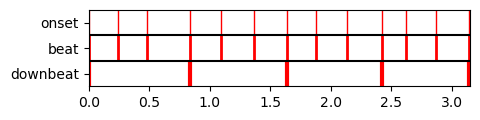

In [1]:
import os
import numpy as np
import librosa
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter1d
import libfmp.b
import libfmp.c6

%matplotlib inline

### load audio wav and adjust amplitude
fn_wav = os.path.join('./data/example_Shostakovich_audio.wav')
Fs = 22050
x, Fs = librosa.load(fn_wav, Fs)
x_duration = len(x)/Fs

### Settings of the figures
export = False
plot_sec = 3.15 # Corresponds to the first four measures 
figsize_nov=(4.35,1.3)

figsize_nov_label=(4.5,1.3)
figsize_wav=(4.4,1.3)
figsize_ann=(4.9,1.3)
figsize_colorbar=(5.2,1.3)
dpi = 100
plot_xlim = [0, plot_sec]
plot_ylim_wav = [-1.05, 1.05]
plot_ylim = [0, 1.05]

### Figure04b
### Visualize eference annotations
fn_ann_inst = './data/example_Shostakovich_ann1.csv'
ann_inst, label_keys_inst = libfmp.c6.read_annotation_pos(fn_ann_inst)
label_keys = {'structure': {'linewidth': 4, 'color': 'r'},
              'downbeat': {'linewidth': 3, 'color': 'r'},
              'beat': {'linewidth': 2, 'color': 'r'}, 
             'onset': {'linewidth': 1, 'color': 'r'}}


fig, ax = libfmp.b.plot_annotation_multiline(ann_inst, label_keys=label_keys, 
                                   sort_labels=[ 'structure','downbeat','beat', 'onset',],  dpi=dpi, figsize=figsize_ann)
ax.set_xlim(plot_xlim );
output_path = os.path.join('./export/Figure04b.png')
if export == True:
    plt.savefig(output_path)

### Figure 4c

Novelty function based on spectral flux.

In the following code cell, we generate and plot novelty function based on spectral flux (Figure 4c).

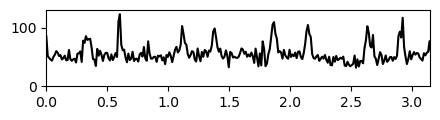

In [2]:
### Figure04c
### Generate a novelty based on spectral flux
N, H = 1024, 256
X = librosa.stft(x, n_fft=N, hop_length=H, win_length=N, window='hann')
freq_max = 3000
### Log compression of STFT magnitude spectrogram
gamma = 10
Y = np.log(1 + gamma * np.abs(X))

### Plot novelty function
Y_diff = np.diff(Y, n=1)
Y_diff[Y_diff < 0] = 0
nov = np.sum(Y_diff, axis=0)
nov = np.concatenate((nov, np.array([0])))
Fs_nov = Fs/H

libfmp.b.plot_signal(nov, Fs_nov, color='k', dpi=dpi, figsize=figsize_nov_label, xlabel='')
plt.xlim(plot_xlim)
plt.ylim([0,130])
plt.tight_layout()
output_path = os.path.join('./export/Figure04c.png')
if export == True:
    plt.savefig(output_path)

### Figure 4d

Smoothed novelty function and and local average function.

In the following code cell, we smooth the novelty function using 1D Gaussian filter and calculate the local average function.

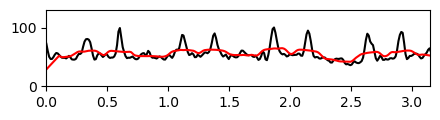

In [3]:
### Figure04d
### Smooth the novelty function and calculate the local average curve
def compute_local_average(x, M):
    """Compute local average of signal

    Notebook: C6/C6S1_NoveltySpectral.ipynb

    Args:
        x (np.ndarray): Signal
        M (int): Determines size (2M+1) in samples of centric window  used for local average

    Returns:
        local_average (np.ndarray): Local average signal
    """
    L = len(x)
    local_average = np.zeros(L)
    for m in range(L):
        a = max(m - M, 0)
        b = min(m + M + 1, L)
        local_average[m] = (1 / (2 * M + 1)) * np.sum(x[a:b])
    return local_average

### Gaussian smoothing for the novelty function
sigma=1
nov = gaussian_filter1d(nov, sigma=sigma)
### Local average
M_sec = 0.1
M = int(np.ceil(M_sec * Fs_nov))
locav = compute_local_average(nov, M)

libfmp.b.plot_signal(nov, Fs_nov, color='k', dpi=dpi, figsize=figsize_nov_label, xlabel='')
plt.xlim(plot_xlim)
plt.ylim([0,130])
plt.tight_layout()
t_novelty = np.arange(nov.shape[0]) / Fs_nov
plt.plot(t_novelty, locav, 'r')
plt.tight_layout()
output_path = os.path.join('./export/Figure04d.png')
if export == True:
    plt.savefig(output_path)

### Figure 4e

Enhanced novelty function

In the following code cell, we enhance the novelty function by subtracting the local average function and keeping only the positive values. 

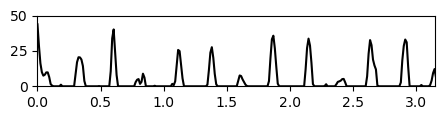

In [4]:
### Figure04e
### Plot the enhanced novelty function
nov_locav_norm =  nov - locav
nov_locav_norm[nov_locav_norm<0]=0
libfmp.b.plot_signal(nov_locav_norm, Fs_nov, color='k', dpi=dpi, figsize=(4.55, 1.3) , xlabel='')
plt.xlim(plot_xlim)
plt.ylim([0,50])
plt.tight_layout()
output_path = os.path.join('./export/Figure04e.png')
if export == True:
    plt.savefig(output_path)

### Figure 4f

Max-normalized novelty function and local max function (red curve). 

In the following code cell, we apply max-normalization using global maximum of the novelty function and calculate the local max function.

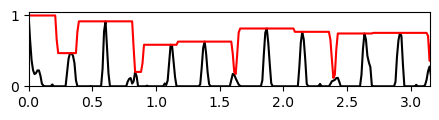

In [5]:
### Figure04f
### Max-normalized function and the local max function
def compute_local_max(x, M):
    """Compute local average of signal

    Notebook: C6/C6S1_NoveltySpectral.ipynb

    Args:
        x (np.ndarray): Signal
        M (int): Determines size (2M+1) in samples of centric window  used for max average

    Returns:
        local_average (np.ndarray): Local average signal
    """
    L = len(x)
    local_max = np.zeros(L)
    for m in range(L):
        a = max(m - M, 0)
        b = min(m + M + 1, L)
        # local_average[m] = (1 / (2 * M + 1)) * np.sum(x[a:b])
        local_max[m] = np.max(x[a:b])
    return local_max

### Max normalization of the enhanced novelty function 
nov_norm = nov_locav_norm / np.max(nov_locav_norm)

### local maximum
M_sec = 0.2
M = int(np.ceil(M_sec * Fs_nov))
locmax = compute_local_max(nov_norm, M)

libfmp.b.plot_signal(nov_norm, Fs_nov, color='k', dpi=dpi, figsize=figsize_nov_label, xlabel='')
plt.xlim(plot_xlim)
plt.ylim(plot_ylim)
plt.tight_layout()
t_novelty = np.arange(nov.shape[0]) / Fs_nov
plt.plot(t_novelty, locmax, 'r')
plt.tight_layout()
output_path = os.path.join('./export/Figure04f.png')
if export == True:
    plt.savefig(output_path)


### Figure 4g

Novelty function after local-max normalization.

In the following code cell, we apply max-normalization to the novelty function using local max function from 4f.

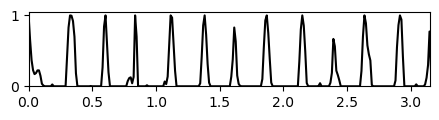

In [6]:
### Figure04g
### Plot local-max normalized novelty function
nov_locmax_norm =  nov_norm / locmax
libfmp.b.plot_signal(nov_locmax_norm, Fs_nov, color='k', dpi=dpi, figsize=figsize_nov_label, xlabel='')
plt.xlim(plot_xlim)
plt.ylim(plot_ylim)
plt.tight_layout()
output_path = os.path.join('./export/Figure04g.png')
if export == True:
    plt.savefig(output_path)

### Figure 4h

Novelty function from 4f after applying the hyperbolic tangent
function.

In the following code cell, we apply hyperbolic tangent to the novelty function from 4f.

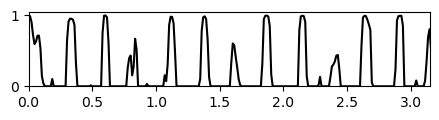

In [7]:
### Figure04h
### Normalization with hyperbolic tangent function
nov_norm_tanh = np.tanh(nov_norm*4)

libfmp.b.plot_signal(nov_norm_tanh, Fs_nov, color='k', dpi=dpi, figsize=figsize_nov_label, xlabel='')
plt.xlim(plot_xlim)
plt.ylim(plot_ylim)
plt.tight_layout()
output_path = os.path.join('./export/Figure04h.png')
if export == True:
    plt.savefig(output_path)

### Further Notes and Links


<ul>
<li><span style="color:black">
Meinard Müller and Ching-Yu Chiu: <a href="https://ieeexplore.ieee.org/document/6353546"><strong>A Basic Tutorial on Novelty and Activation Functions for Music Signal Processing.</strong></a> Transaction of the International Society for Music Information Retrieval (TISMIR), ??: ??–??, 2024. 
<br>
<a type="button" class="btn btn-default btn-xs" target="_blank" href="./data/bibtex_MuellerC24_EduNovFct_TISMIR.txt"> Bibtex </a>
<a type="button" class="btn btn-default btn-xs" target="_blank" href="https://github.com/groupmm/edu_novfct">GitHub</a></span></li>

</ul> 

<div>
<a href="https://opensource.org/licenses/MIT"><img src="data/Edu_NovFct_License.png" width=100% style="float: right;" alt="PCP License"></a>
</div>